<a href="https://colab.research.google.com/github/websterramos/case-analise-dados/blob/master/case_tecnico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Primeiramente, devemos instalar o conector do BigQuery com o Python

In [1]:
!pip install google-cloud-bigquery

Importando a biblioteca do conector BigQuery

In [2]:
from google.cloud import bigquery
from google.oauth2 import service_account

In [ ]:
import pandas as pd

Estabelecendo uma conexão com o BigQuery

In [3]:
credentials = service_account.Credentials.from_service_account_file(
    'infra-filament-408404-e0893665e06a.json') # substituir pela credencial
project_id = 'infra-filament-408404' # substituir pelo id do seu projeto
client = bigquery.Client(credentials= credentials,project=project_id)

Para realizar a consulta no banco de dados vamos utilizar a coluna **created_at**, que contém a data de um pedido, e iremos utilizar apenas o ano e o mês dessa data. Além disso, a coluna **order_id** é verificada para que não tenha mais de uma linha no banco de um mesmo pedido, em seguida o número de pedidos são contados.

In [4]:
query = client.query(
    """
    SELECT
      FORMAT_DATE("%Y-%m", created_at) as order_date,
      COUNT(DISTINCT order_id) as total_orders
    FROM `bigquery-public-data.thelook_ecommerce.order_items`
    GROUP BY order_date
    ORDER BY order_date
    """)
orders = query.to_dataframe()
display(orders)

,order_date,total_orders
0,2019-01,15
1,2019-02,51
2,2019-03,91
3,2019-04,129
4,2019-05,183
5,2019-06,206
6,2019-07,204
7,2019-08,279
8,2019-09,313
9,2019-10,383


Utilizando do método **plot** do tipo **bar** (gráfico de barras verticais) para ilustrar esses dados para uma fácil visualização.

<Axes: title={'center': 'Number of orders per month of the year'}, xlabel='Order date', ylabel='Orders'>

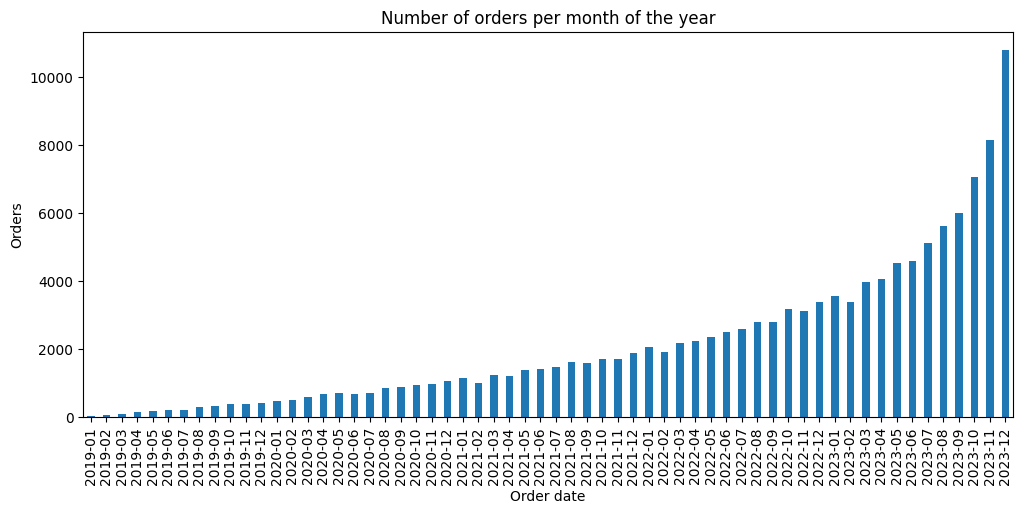

In [5]:
orders.plot.bar(figsize=[12,5], x='order_date', y='total_orders', xlabel='Order date', ylabel='Orders', title='Number of orders per month of the year', legend=False)

De acordo com o gráfico acima podemos observar que o número de pedidos é crescente ao longo dos meses do ano. Esse padrão se repete em todos os anos presentes no banco de dados.

Para verificarmos a receita desse e-commerce precisamos das datas em formate de mês/ano, o status dos pedidos (ignorando aqueles que foram cancelados ou devolvidos) e a soma do valor das vendas realizadas.

In [6]:
query = client.query(
    """
    SELECT
      FORMAT_DATE("%Y-%m", created_at) AS order_date,
      status,
      SUM(sale_price) as total_sale_price
    FROM `bigquery-public-data.thelook_ecommerce.order_items`
    WHERE status != 'Cancelled' AND status != 'Returned'
    GROUP BY order_date, status
    ORDER BY order_date, status
    """)
revenue = query.to_dataframe()
display(revenue)

,order_date,status,total_sale_price
0,2019-01,Complete,291.899997
1,2019-01,Processing,385.510000
2,2019-01,Shipped,210.940002
3,2019-02,Complete,1581.700001
4,2019-02,Processing,233.160000
...,...,...,...
175,2023-11,Processing,136515.140062
176,2023-11,Shipped,204904.530267
177,2023-12,Complete,223636.090152
178,2023-12,Processing,194926.770347


In [7]:
revenue_by_months = revenue.groupby(['order_date']).sum()
display(revenue_by_months)

<ipython-input-7-aaedfbcb4656>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  revenue_by_months = revenue.groupby(['order_date']).sum()


,total_sale_price
order_date,
2019-01,888.349999
2019-02,3792.100006
2019-03,6516.759979
2019-04,8165.610016
2019-05,12121.719983
2019-06,12026.340032
2019-07,12767.200015
2019-08,19662.260005
2019-09,18775.550021


<Axes: title={'center': 'Revenue per month of the year'}, xlabel='Order date', ylabel='Revenue'>

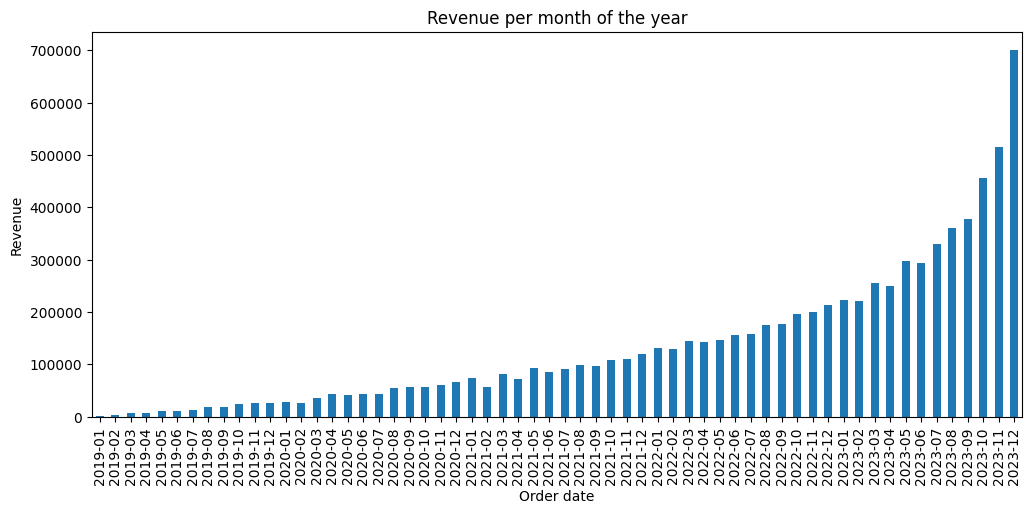

In [8]:
revenue_by_months.plot.bar(figsize=[12,5], xlabel='Order date', ylabel='Revenue', title='Revenue per month of the year', legend=False)

Com o gráfico, pode-se observar que a receita do e-commerce cresce a cada ano e tem a tendencia a ser maior no período final do ano. Também, a receita apresenta uma leve queda nos meses de fevereiro, em relação a janeiro, comportamento que ocorre desde 2020.

A consulta a seguir tem o objetivo de descobrir quais produtos foram mais vendidos em cada mês. Para isso precisamos da contagem de pedidos, o número de itens do pedido e o nome do produto.

In [9]:
query = client.query(
    """
    SELECT
      FORMAT_DATE("%Y-%m", oi.created_at) AS order_date,
      COUNT(DISTINCT oi.order_id) as total_orders,
      o.num_of_item,
      p.name
    FROM `bigquery-public-data.thelook_ecommerce.order_items` AS oi
    INNER JOIN `bigquery-public-data.thelook_ecommerce.orders` AS o
    ON o.order_id = oi.order_id
    INNER JOIN `bigquery-public-data.thelook_ecommerce.products` AS p
    ON p.id = oi.product_id
    GROUP BY order_date, o.num_of_item, p.name
    ORDER BY order_date
    """)
products_df = query.to_dataframe()
display(products_df)

,order_date,total_orders,num_of_item,name
0,2019-01,1,2,New Mens Solid Black Retro Skinny Necktie 1.5 Tie
1,2019-01,1,1,Carhartt Men's The Fixer Spandex Work Glove wi...
2,2019-01,1,1,Pennant Big and Tall Beefy Jersey Pocket T-Shirt
3,2019-01,1,4,Smartwool PhD Running Ultra Light Mini Socks
4,2019-01,1,1,Skechers Men's 5025 Sport Sunglasses
...,...,...,...,...
173740,2023-12,1,1,The North Face Denali Down Mens Jacket 2013
173741,2023-12,1,2,The North Face Denali Down Womens Jacket 2013
173742,2023-12,1,1,The North Face Nuptse 2 Jacket - Noah Green/TN...
173743,2023-12,1,1,ASCIS Cushion Low Socks (Pack of 3)


Primeiro, precisamos multiplicar os pedidos totais com o número de itens do produto vendido, para obtermos o número total de venda. Após isso, precisamos agrupar para uma melhor visualização no data frame.

In [25]:
products_df['total_sales'] = products_df['total_orders'] * products_df['num_of_item']
products = products_df.groupby(['order_date', 'total_sales', 'name']).sum()
display(products)

total_orders  \
order_date total_sales name                                                               
2019-01    1           American Apparel Cotton Spandex Jersey Harem Pant              1   
                       Billabong Oxlee Flannel Shirt - Long-Sleeve - M...             1   
                       C-IN2 Men's Core Basic Crew Neck Tee                           1   
                       Carhartt Men's The Fixer Spandex Work Glove wit...             1   
                       Filson Blaze Orange Cruiser Vest 10062BL - Blaze               1   
...                                                                                 ...   
2023-12    9           Jerzees 437 5.6 oz. 50/50 Jersey Polo with Spot...             3   
                       LRG Core Collection TS Twill Pant - Men's                      3   
                       Lilly Pulitzer Women's Callahan Short                          3   
           10          7 For All Mankind Men's Standard Classic Straig...             5   
           12          Ray-Ban Unisex RB4034P Sunglasses                              3   

                                                                           num_of_item  
order_date total_sales name                                                             
2019-01    1           American Apparel Cotton Spandex Jersey Harem Pant             1  
                       Billabong Oxlee Flannel Shirt - Long-Sleeve - M...            1  
                       C-IN2 Men's Core Basic Crew Neck Tee                          1  
                       Carhartt Men's The Fixer Spandex Work Glove wit...            1  
                       Filson Blaze Orange Cruiser Vest 10062BL - Blaze              1  
...                                                                                ...  
2023-12    9           Jerzees 437 5.6 oz. 50/50 Jersey Polo with Spot...            3  
                       LRG Core Collection TS Twill Pant - Men's                     3  
                       Lilly Pulitzer Women's Callahan Short                         3  
           10          7 For All Mankind Men's Standard Classic Straig...            2  
           12          Ray-Ban Unisex RB4034P Sunglasses                             4  

[173273 rows x 2 columns]